# .CNN을 이용한 고양이 강아지 분류 

- 587 ~ 600

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# 외부 이미지로 테스트 해보기
from tensorflow.keras.preprocessing import image

In [ ]:
train_path = \
     "/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/cats_and_dogs/cats_and_dogs_small/train"

test_path = \
     "/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/cats_and_dogs/cats_and_dogs_small/test"

In [ ]:
IM_WIDTH = 220
IM_HEIGTH = 220

In [ ]:
# 이미지 전처리 ,  크기 rescale 해서 가져옴
train_datagen = ImageDataGenerator(
    
    # 이미지 값의 범위
    rescale = 1/255,
    rotation_range = 180,
    width_shift_range = 0.2,
    height_shift_range= 0.2,
    horizontal_flip = True,
    vertical_flip =True
)

# 테스트셋 이미지 로드
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (IM_HEIGTH,IM_WIDTH),
    batch_size = 16,
    class_mode = 'binary',
    shuffle = True
)

# 테스트셋
test_datagen = ImageDataGenerator(
    rescale = 1/255
    )
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size =(IM_HEIGTH, IM_WIDTH),
    batch_size = 10,
    class_mode = 'binary',
    shuffle = False
) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
img , label = train_generator.next()

In [ ]:
# 순차모델 객체 생성
model = Sequential()

model.add(Conv2D(32, 
                 kernel_size=(3,3), 
                 input_shape=(220, 220, 3),
                 activation= 'relu',
                 padding = 'SAME'
                 )           
          )

# 맥스 풀링
model.add(MaxPooling2D(pool_size = 2, padding ='SAME'))

# 합성곱 연산
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="SAME"))

# 맥스 풀링
model.add(MaxPooling2D(pool_size = 2, padding ='SAME'))

# 합성곱 연산
model.add(Conv2D(128, kernel_size = (3, 3), padding = 'SAME', activation = 'relu'))

# 맥스 풀링
model.add(MaxPooling2D(pool_size = 2, padding ='SAME'))

# fully_connected layer
model.add(Flatten())

# dropout
model.add(Dropout(0.5))

# 밀집층
model.add(Dense(512, activation = 'relu'))

# dropout
model.add(Dropout(0.5))

# 한개로 회귀
model.add(Dense(1,activation = 'sigmoid'))

# summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)           

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 1e-5),
              metrics = ['acc']
              )

model.fit(train_generator, epochs = 3)

model.save("cats_and_dogs.h5")

Epoch 1/3
125/125 [==============================] - 385s 3s/step - loss: 0.6972 - acc: 0.5090
Epoch 2/3
125/125 [==============================] - 37s 299ms/step - loss: 0.6915 - acc: 0.5360
Epoch 3/3
125/125 [==============================] - 35s 279ms/step - loss: 0.6868 - acc: 0.5430


In [ ]:
# 성능 테스트

# 테스트 데이터의 정확도의 합을 저장 할 변수
total_acc = 0

for index in range(100):

  # 이미지 정보(고양이 or 강아지) -> X_test
  # 이미지 정보에 대한 정답 -> y_test
  X_test, y_test = test_generator.next()

  # 예측
  predict = model.predict(X_test)
  predict01 = np.where(predict > 0.5, 1, 0)
  predict02 = predict01.flatten()

  predict03 = (predict02 == y_test)

  acc = np.sum(predict03)/len(predict03)
  
  # 정확도를 total_acc에 추가
  total_acc =  total_acc + acc

# 정확도 평균 계산
print("정확도 평균 : ",total_acc/100)

정확도 평균 :  0.5629999999999997


In [ ]:
# 모델 성능 측정

# 모델 경로
model_path = '/content/drive/MyDrive/cats_and_dogs_small_cnn.h5'

# 100epochs Sqeuential 모델 로드
model = load_model(model_path)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [ ]:
# 테스트 이미지 경로
cat1_path = '/content/cat1.jpg'

# 이미지 로드, 2차원 배열, 가로 세로 220으로 수정
img = image.load_img(cat1_path, target_size = (220, 220))
img

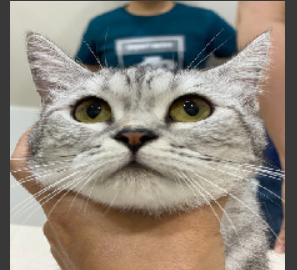

In [ ]:
# 이미지를 3차원 배열로 리턴
img_tensor = image.img_to_array(img)
img_tensor = img_tensor/255
print(img_tensor.shape)


# 차원 변환
# 4차원으로 
img_tensor = np.expand_dims(img_tensor, axis = 0)
print(img_tensor.shape)

(220, 220, 3)
(1, 220, 220, 3)


In [ ]:
# 예측
model.predict(img_tensor)

array([[0.22139643]], dtype=float32)